# importing libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.cluster import KMeans


<IPython.core.display.Javascript object>

# Load Data

In [2]:
df = pd.read_excel("Credit+Card+Customer+Data.xlsx")

<IPython.core.display.Javascript object>

In [3]:
df.shape

(660, 7)

<IPython.core.display.Javascript object>

In [4]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


<IPython.core.display.Javascript object>

In [5]:
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


<IPython.core.display.Javascript object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<IPython.core.display.Javascript object>

In [7]:
# making copy
data = df.copy()

<IPython.core.display.Javascript object>

# Data Pre-processing

#### We do not need Sl_No and Customer Key

In [8]:
data.drop("Sl_No", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [9]:
data.drop("Customer Key", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [10]:
# Checking for missing. values
data.isna().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<IPython.core.display.Javascript object>

In [11]:
# checking for duplicates
data.duplicated().sum()

11

<IPython.core.display.Javascript object>

There are 11 duplicates and we exclude this

In [12]:
data = data[(~data.duplicated())].copy()

<IPython.core.display.Javascript object>

In [13]:
data.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,649.000000,649.000000,649.000000,649.000000,649.000000
mean,34878.274268,4.708783,2.397535,2.624037,3.590139
std,37813.736638,2.173763,1.625148,2.952888,2.877911
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,11000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,49000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


<IPython.core.display.Javascript object>

#### Observations

Average Credit Limit of the customers is 34,574

The average number of credit cardsn customers hold is 4.7

Customers visit the bank personally about 2.4 times a year

Customers visit the bank online 2.6 times on average

The customer makes 3.59 calls to the bank on an average every year

# EDA

### Univariate Analysisis

In [14]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observations on Customer's Average Credit Limit

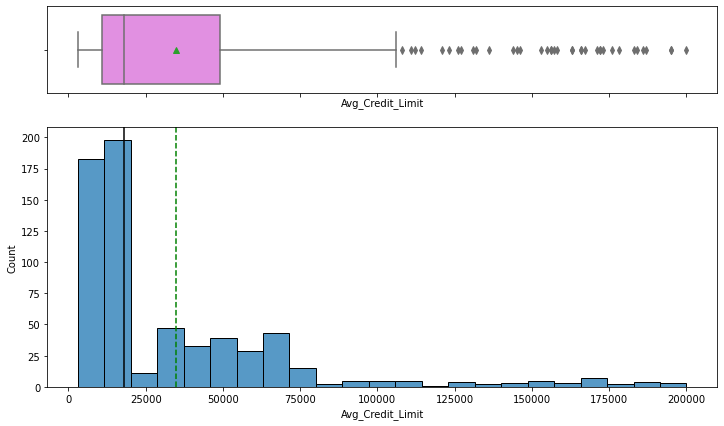

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(data, "Avg_Credit_Limit")

### Observations on Customer's Number of Credit Cards

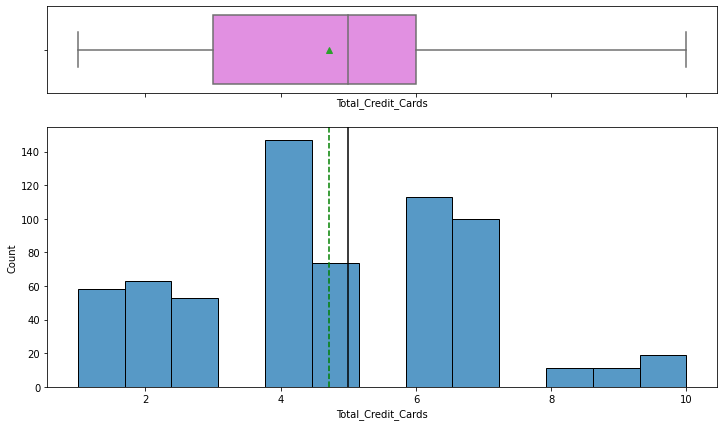

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(data, "Total_Credit_Cards")

### Observations on Customer's Number of Visits to bank personally

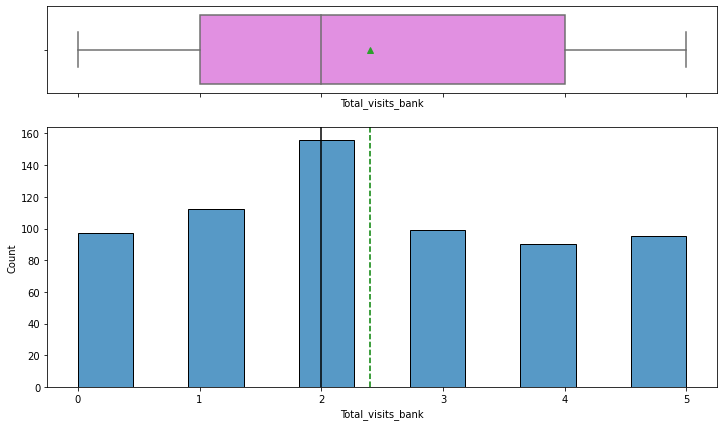

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(data, "Total_visits_bank")

### Observations on Customer's Number of visits online

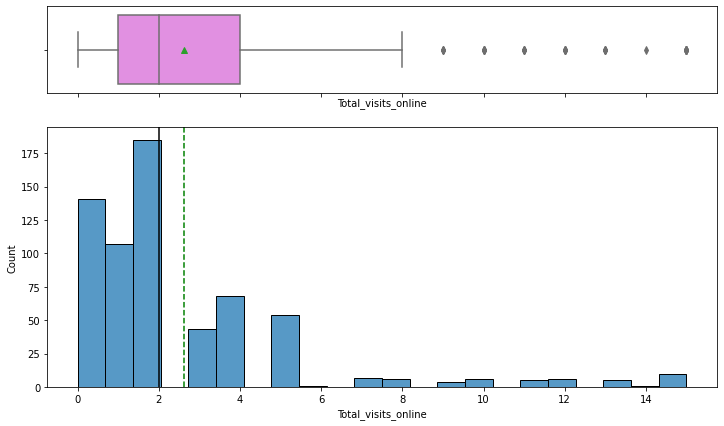

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(data, "Total_visits_online")

### Observations on Number of calls made by Customer to the Bank

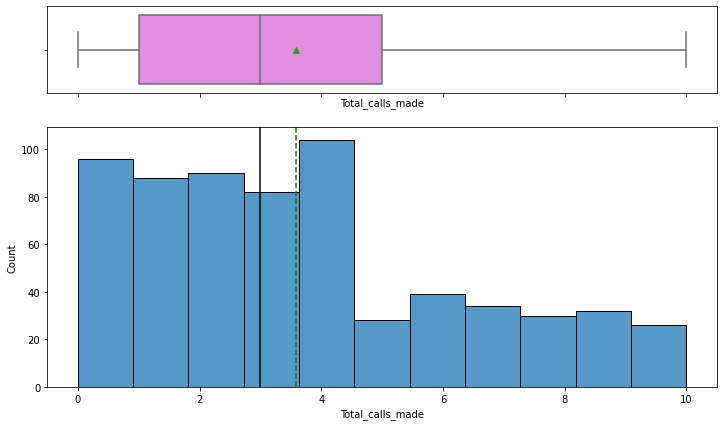

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(data, "Total_calls_made")

## Observations 

Average Credit Limit is right skewed with presence of upper outlier, which show the customers with a migh higher credit limit. Majority of the customers have a crefit limit below 25000

The number of total visits to the bank has a right-skewed distribution

The total number of credit cards a customer has a left-skewed distribution with the average number of cards being between 4-7

The number of visits online appears to have a. right skewed distribution with upper outliers indicating few customers do visit the bank online more that 2 times a year

The number of calls made to the bank is right-skewed as well with an average number of calls being 3

In [20]:
num_col = data.select_dtypes(include=np.number).columns.tolist()


<IPython.core.display.Javascript object>

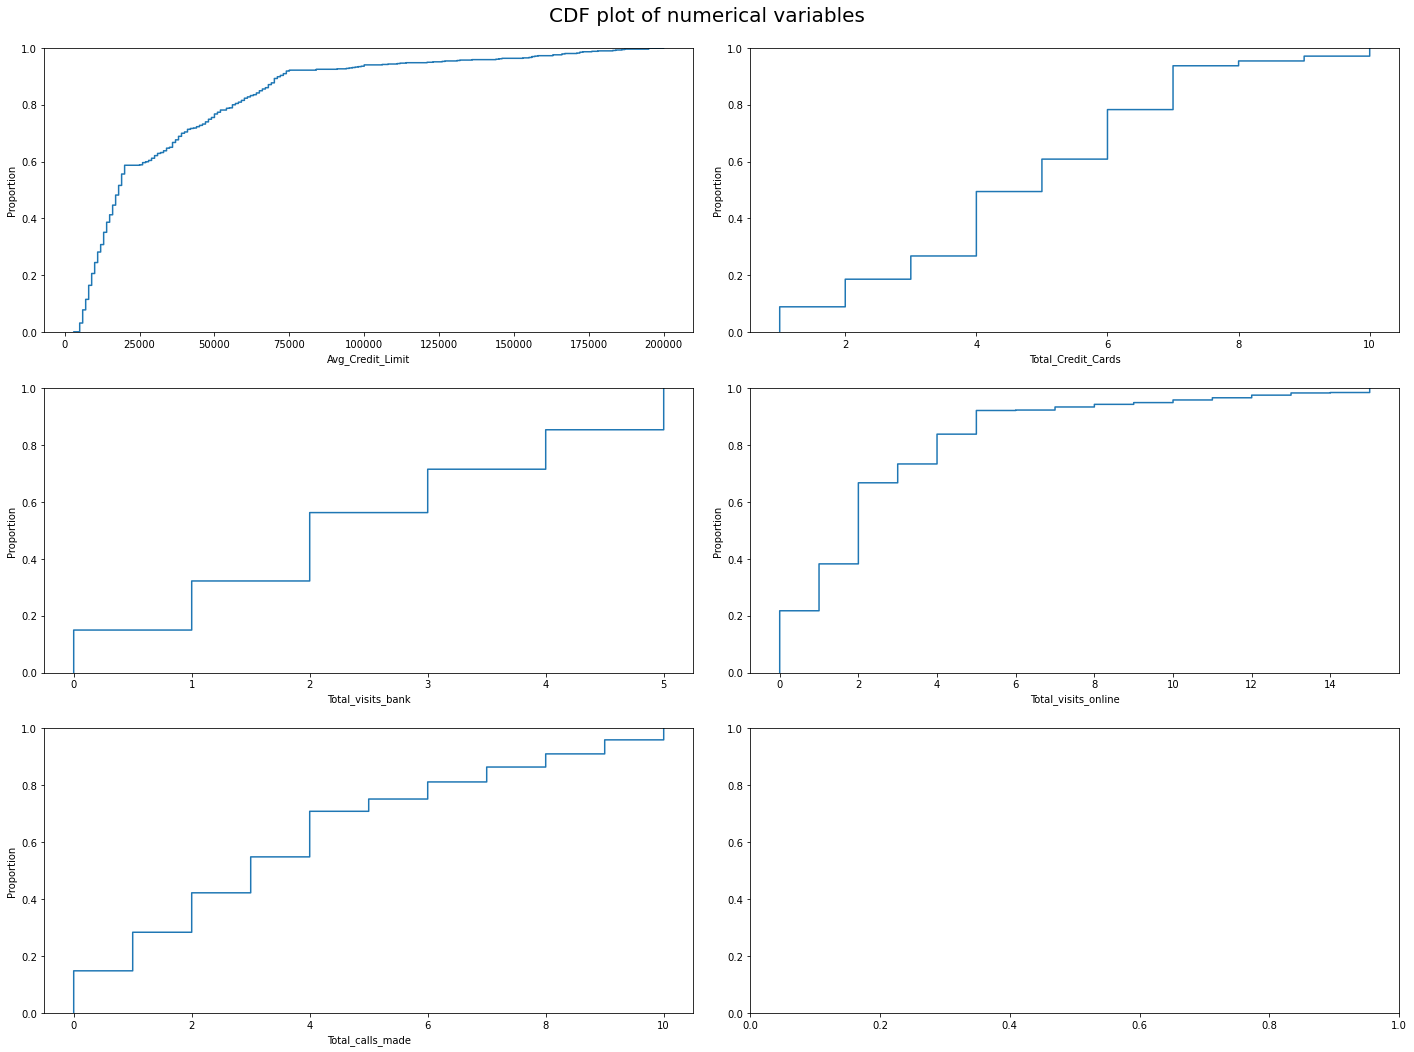

<IPython.core.display.Javascript object>

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=data[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=data[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

## Observations

60% of the customers have a credit limit below 25000

90% of the customers have less than 7 credit cards

85% of the customers visit the bank personally less than 4 times a year

90% of the customers visit the bank online less than 5 times a year while the 10% visit more than 5 times

80% of the customers called the bank less than 6 times a year

In [22]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

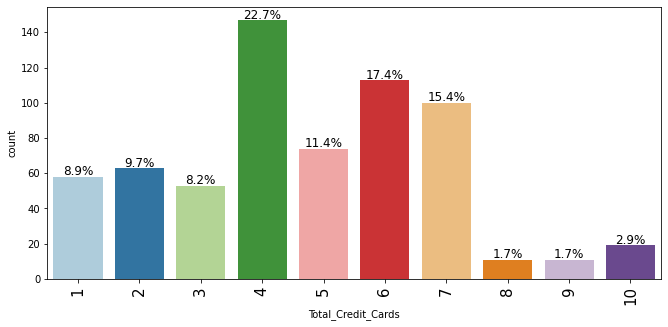

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(data, "Total_Credit_Cards", perc=True)

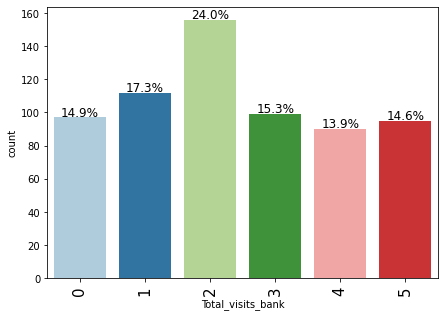

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(data, "Total_visits_bank", perc=True)

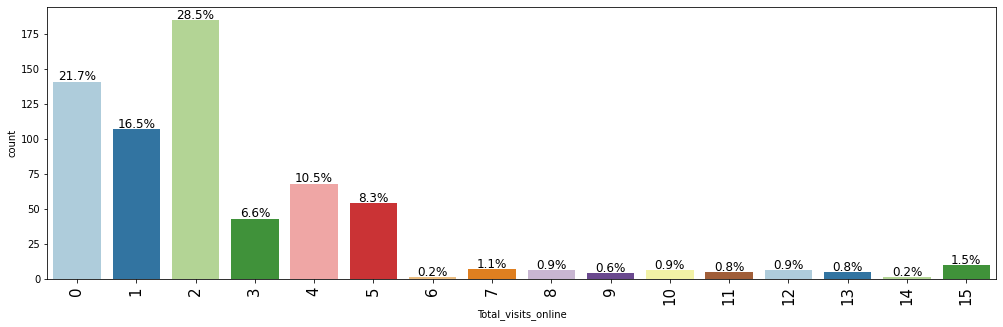

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(data, "Total_visits_online", perc=True)

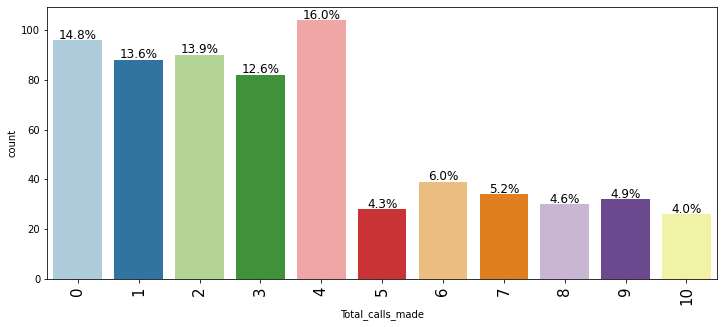

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(data, "Total_calls_made", perc=True)

## Observations

We see that 70% of the customers made less than 4 calls yearly

We see that the mjority of customers visited the bank online twice

We also observe that qround 70% if the customers visit the bank 2 times or more

Also as stated earlier, around 60% of the customers have 4-7 credit cards

# Bivariate Analysis

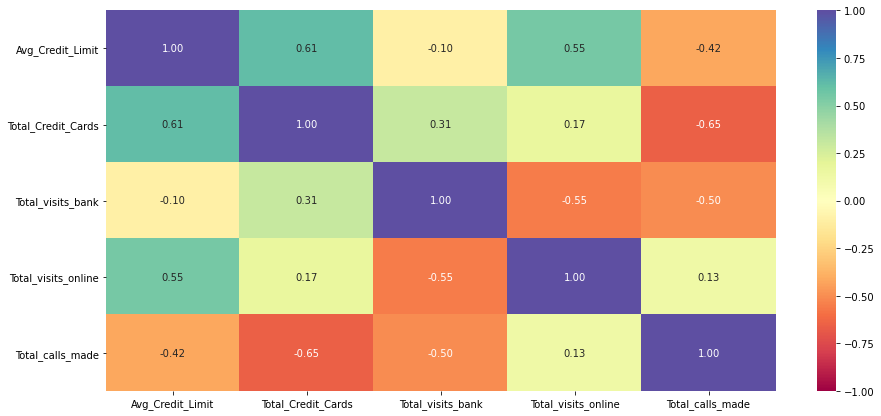

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### Observations

The average credit limit and total number of credit cards are positively correlated. Higher use of credit

There is also a posotive correlation between average credit limit and total visits made online

Total credit cards and total calls made have a high negatively correlated relationship

Total visits to bank personally and online have a negative correlation as the customer would choose either one. Total visits to the bank made also has a negative relationship with the number of calls made




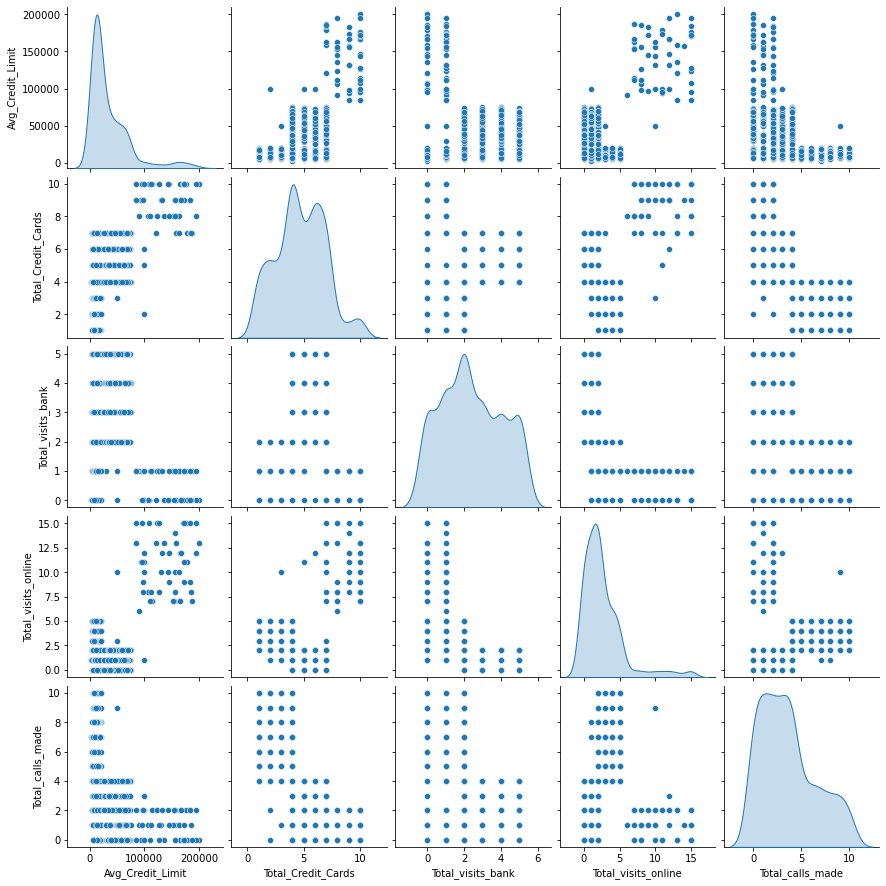

<IPython.core.display.Javascript object>

In [28]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

# Scaling variables for clustering

In [29]:
# scaling dataset
scaler = StandardScaler()
sub = data.copy()
sub_scaled = scaler.fit_transform(sub)

<IPython.core.display.Javascript object>

In [30]:
subset_scaled_df = pd.DataFrame(sub_scaled, columns=sub.columns)

<IPython.core.display.Javascript object>

### Checking number of clusters 

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

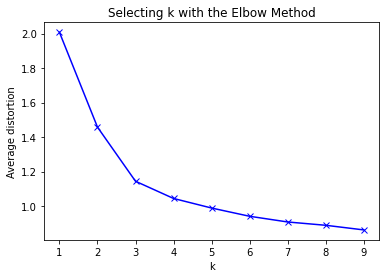

<IPython.core.display.Javascript object>

In [31]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(sub_scaled)
    prediction=model.predict(sub_scaled)
    meanDistortions.append(sum(np.min(cdist(sub_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / sub_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


We see a bend at 2 clusters, but a more prominent vend can be seen at 3 clusters

## Hierarchical Clustering

In [32]:
# types distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# types linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7395135051413775.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8794736468795109.
Cophenetic correlation for Euclidean distance and average linkage is 0.8974425535306298.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8551098644586315.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7379112982920528.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8578617029322211.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8960370054789858.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.893309534644998.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7054746377393306.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6513369047977687.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8330283182400025.
Cophenetic cor

<IPython.core.display.Javascript object>

In [33]:
# distance metric and linkage method with the highest cophenetic correlation
print(
    "Cophenetic correlation with the highest value is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation with the highest value is 0.8974425535306298, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

### Only with Euclidean Distance

In [34]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7395135051413775.
Cophenetic correlation for complete linkage is 0.8794736468795109.
Cophenetic correlation for average linkage is 0.8974425535306298.
Cophenetic correlation for centroid linkage is 0.894471288720818.
Cophenetic correlation for ward linkage is 0.7425813590948763.
Cophenetic correlation for weighted linkage is 0.8551098644586315.


<IPython.core.display.Javascript object>

In [45]:
# distance metric and linkage method with the highest cophenetic correlation
print(
    "Cophenetic correlation with the highest value is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation with the highest value is 0.8974425535306298, which is obtained with average linkage.


<IPython.core.display.Javascript object>

### Observations

We see that cophenetic correlation is maximum with Euclidean distance with average linkage with a cophenetic correlation of 0.897

#### Looking at dendrograms of different linkage methods 

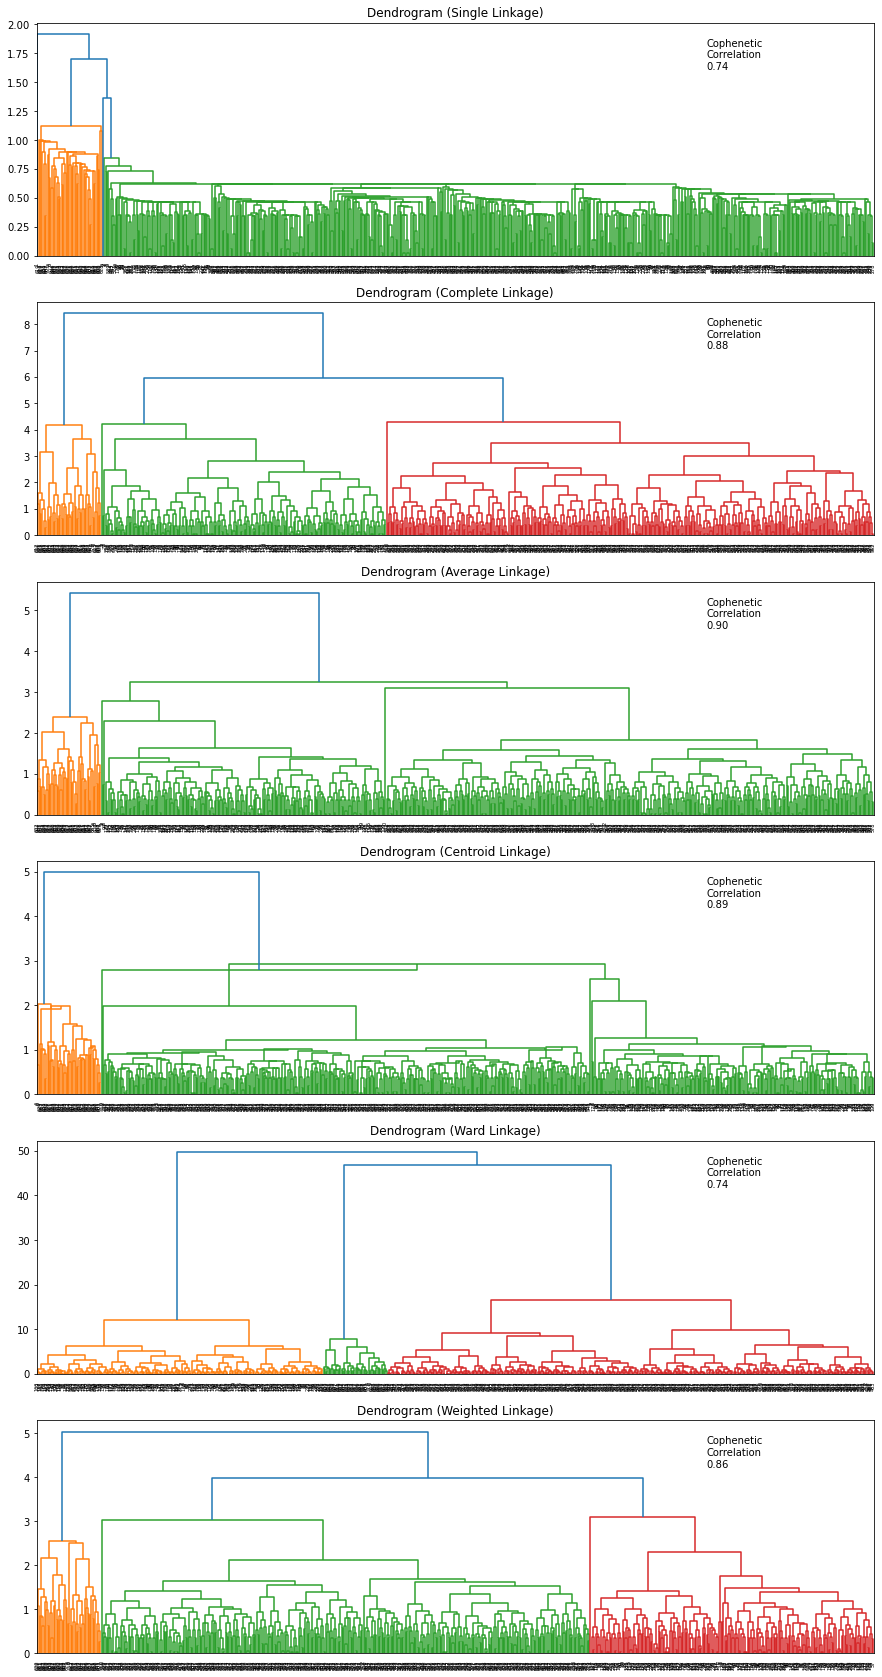

<IPython.core.display.Javascript object>

In [36]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

### Observations
Dendogram with Ward Linkage shows clear and distinct clusters

The appropriate number of clusters would be 3 with Ward Linkage Method

In [37]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.739514
1,complete,0.879474
2,average,0.897443
3,centroid,0.894471
4,ward,0.742581
5,weighted,0.855110


<IPython.core.display.Javascript object>

### Creating 3 clusters 

In [38]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=3)

<IPython.core.display.Javascript object>

In [39]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Profiling Clusters 

In [40]:
cluster_profile = data.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [41]:
cluster_profile["count_in_each_segments"] = (
    data.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [42]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,34143.236074,5.519894,3.488064,0.978780,1.986737,377
1,12216.216216,2.423423,0.950450,3.554054,6.878378,222
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

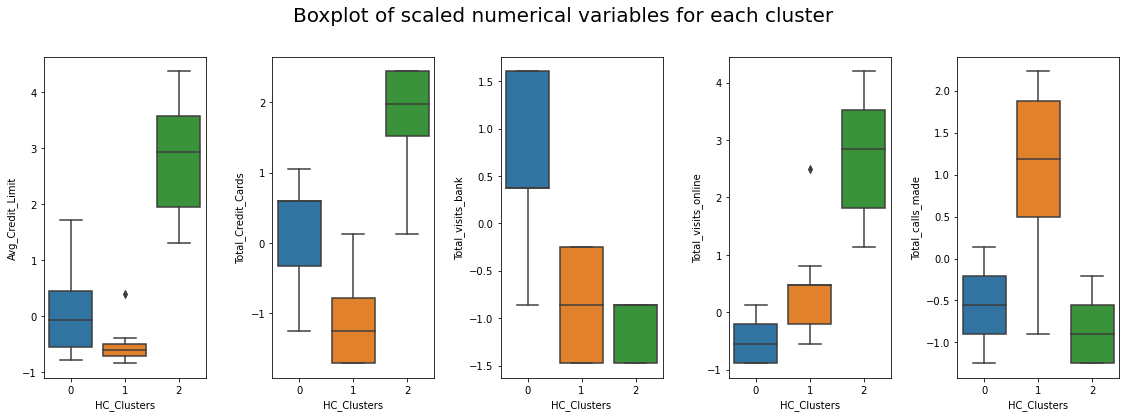

<IPython.core.display.Javascript object>

In [43]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

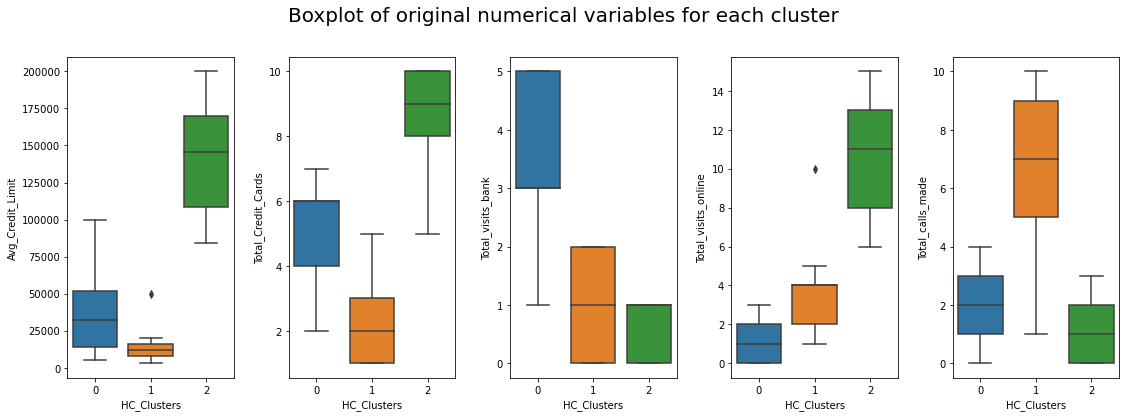

<IPython.core.display.Javascript object>

In [44]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data[num_col[counter]], x=data["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

# Insights

### Cluster 0:

This cluster is for people who utilize their credit between 10,000 to 100,000 dollars with a median of 30000 dollars being the utilizstion

Almost most of the customers have an average of 5 credit cards

These people visit the bank personally the highest number of times between 3-5 times

The people from this cluster visit the bank onlinne the least betweeb 0-3 times

The total number of times the people from this cluster called the bank is between 0-4 times

### Cluster 1:

This cluster is for people who utilize their credit between 4,000 to 25,000 dollars with a median of 12000 dollars being the credit utilizstion

Most of the customers have an average of 2 credit cards

These people visit the bank personally the highest number of times between 0-2 times

The people from this cluster visit the bank online the least betweeb 1-5 times

The total number of times the people from this cluster called the bank is between 1-10 times with an average of 7 calls made

### Cluster 2:

This cluster is for people with the highest utilization of their credit between 70,000 to 200,000 dollars with a median of 140000 dollars being the credit utilizstion

Almost most of the customers have an average of 9 credit cards

These people visit the bank personally the least number of times between 0-1 times

The people from this cluster visit the bank online an average of 11 times 

The total number of times the people from this cluster called the bank is between 0-3 times



# Business Recommendations

Cluster 0: This shows the customers with average credit utilization which is 30000 dollars with an average of 5 credit cards. This shows the population of the people earning a normal salary. This cluster must be targerted improving their visits made to the bank online by targetting online campaigns at them

Cluster 1: This cluster shows the customers with the least credit utilization with the lowest number of vredit cards. This population of customers in the cluster either have a bad credit score, are unemployed or make a lower income. This customer cluster can be targeted by providing them loans with lower intrest rates to appeal them and place them in the campaign targeted towards the people in the lower income sector.

Cluster 2: This cluster consits of customers with the highest credit utilization with an average of 140000 dollars and an average of 9 credit cards per person. This customer segment has the best spending pattern and the reasons for this could be a higher credit score, above average earnings and education. This customer segment also vists the bank the most online. This customer segment could be targeted by promoting premium cards with exclusive membership benefits to them. 